In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = \
    imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [ ]:
train_data[0]

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [8]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

In [10]:
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [22]:
len(reverse_word_index)

88584

In [28]:
import numpy as np

def vectorize_sequences(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)


In [61]:
x_train[10][1621]

0.0

In [31]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [43]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [62]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [65]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [66]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [67]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5267 - acc: 0.7920 - val_loss: 0.4229 - val_acc: 0.8340
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3178 - acc: 0.9011 - val_loss: 0.3141 - val_acc: 0.8838
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2287 - acc: 0.9290 - val_loss: 0.2785 - val_acc: 0.8917
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1791 - acc: 0.9423 - val_loss: 0.2763 - val_acc: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1442 - acc: 0.9537 - val_loss: 0.2788 - val_acc: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1201 - acc: 0.9619 - val_loss: 0.2915 - val_acc: 0.8864
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0988 - acc: 0.9694 - val_loss: 0.3039 - val_acc: 0.8865
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0789 - a

In [68]:
history_dict = history.history

In [69]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

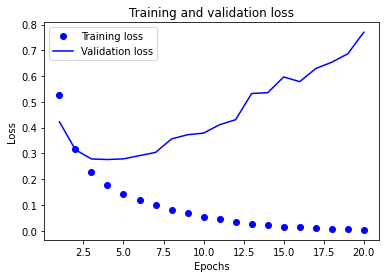

In [71]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

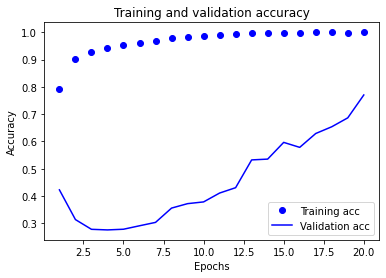

In [73]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4736 - accuracy: 0.8154
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2689 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2056 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3213 - accuracy: 0.8711


In [75]:
results

[0.3212936222553253, 0.8711199760437012]

In [76]:
model.predict(x_test)

array([[0.16431272],
       [0.999909  ],
       [0.764434  ],
       ...,
       [0.06737229],
       [0.05107781],
       [0.39816645]], dtype=float32)